<div style="border: 3px solid #0074D9; border-radius: 15px; background: linear-gradient(135deg, #eaf3ff, #d6e6ff); padding: 25px; text-align: center; box-shadow: 0px 0px 12px rgba(0,0,0,0.1); margin-top: 20px;">

  <h3 style="color:#004080; font-family:'Segoe UI', sans-serif; margin-bottom: 10px;">
    Dr. Jesús Martí Gavilá
  </h3>
  <p style="font-size:16px; color:#004080; margin-top: 0;text-align: center">
    Departamento de Ingeniería Cartográfica, Geodesia y Fotogrametría
  </p>

  <hr style="width:60%; border:1px solid #0074D9; margin:20px auto;">

  <h1 style="color:#003366; font-family:'Trebuchet MS', sans-serif; font-size:40px; margin-bottom: 5px;">
    PRÁCTICA 7
  </h1>
  <h2 style="color:#004d99; font-family:'Trebuchet MS', sans-serif; font-size:24px; margin-top: 0;">
    CURSO BÁSICO PYTHON: FICHERO GPX
  </h2>

  <div style="text-align: center; margin: 20px 0;">
    <a href="http://www.upv.es/titulaciones/GTI/indexc.html" target="_blank">
      <img src="https://www.upv.es/entidades/epsg/wp-content/themes/upv/assets/upv_logo.svg" width="180" style="border:none;">
    </a>
      
  </div>

  <h3 style="color:#003366; font-family:'Segoe UI', sans-serif; margin-top: 10px;">
    Grado en Tecnologías Interactivas | Tecnologías de la Información Geográfica
  </h3>
</div>


<div style="border: 2px solid #0074D9; border-radius: 12px; background: linear-gradient(135deg, #eaf3ff, #d6e6ff); padding: 20px; text-align: center; box-shadow: 1px 1px 6px rgba(0,0,0,0.1); margin-top: 25px;">
  <h2 style="color:#003366; font-family:'Trebuchet MS', sans-serif;">Datos del alumno</h2>
  <hr style="width:50%; border:1px solid #0074D9; margin-bottom:20px;">
  <p style="font-size:18px; color:#004d99; font-family:'Segoe UI', sans-serif;">
    <b>Nombre y Apellidos:</b> <span style="border-bottom:1px dotted #004d99;">&nbsp;&nbsp;&nbsp;Víctor Morant Faus & Denys Litvynov Lymanets&nbsp;&nbsp;&nbsp;</span>
  </p>
  <p style="font-size:18px; color:#004d99; font-family:'Segoe UI', sans-serif;">
    <b>Fecha:</b> <span style="border-bottom:1px dotted #004d99;">&nbsp;&nbsp;&nbsp;18/11/2025 &nbsp;&nbsp;&nbsp;</span>
  </p>
</div>


<font size = 6 color="red" >Enunciado</font>
<p> Esta práctica tiene como objetivo que el alumnado realice un análisis de rendimiento a partir de un fichero GNSS con waypoints en formato GPX. Se trata de una introducción al procesamiento de datos georreferenciados, donde el alumnado deberá aplicar diferentes librerías de Python para calcular y analizar parámetros espaciales y temporales a partir de coordenadas geográficas.
El resultado final incluirá tanto el análisis numérico como la representación gráfica e interactiva de los datos obtenidos.
 <p>
    


<font size = 6 color="red" >Objetivos</font>
<ul>
    <li> Utilizar las diferentes librerías de Python para calcular distancias, orientaciones, pendientes, velocidades a partir de coordenadas geográficas.</li> 
    
</ul>


<font size = 6 color="red" >Entrega</font>
<ul>
    <li>Un Dataframe en formato HTML con los siguientes campos: 
'Punto', 'Latitud', 'Longitud', 'Cota (m)', 'Hora', 'Distancia (m)','Dist_O (m)', 'Pendiente (%)', 'Velocidad (km/h)','Orientación (º)','Tiempo'</li>
    <li>Un gráfico con los valores de distancia en el eje X y valores de pendiente y velocidad en el eje Y</li>
    <li>Un mapa animado del recorrido</li>
</ul>

<div class="borde-gris"> 
<font size = 5 > --------------------------------------------------------------------------------------------------------------</font>
</div>

<div style="border: 3px solid #0074D9; border-radius: 12px; background: linear-gradient(135deg, #eaf3ff, #d6e6ff); padding: 20px; text-align: center; box-shadow: 2px 2px 8px rgba(0,0,0,0.15); margin-top: 25px;">
  <h1 style="color:#003366; font-family:'Trebuchet MS', sans-serif; font-size:36px;">PRACTICA 7</h1>
  <hr style="width:60%; border:1px solid #0074D9;">
  <h3 style="color:#004d99;">Inicio de la resolución</h3>
</div>

# Estructura GPX e importación de librerías

In [3]:
"""
FORMATO EJEMPLO GPX
<wpt lat="38.968484" lon="-0.148688">
	<ele>-6.847729</ele>
	<time>2020-10-06T15:42:19Z</time>
	<name>001</name>
	<sym>Flag, Blue</sym>
</wpt>
"""
import pandas as pd
import xml.etree.cElementTree as et
import os
import math as m
from datetime import datetime
import matplotlib.pyplot as plt

# Fichero de entrada y Dataframe de salida

In [86]:
# Introducción de datos. Solicitar al usuario el nombre del fichero sin extensión.
# Generar un path para un fichero .gpx y otro para .HTML
# Los archivos se llamaran Ruta_1.gpx y Ruta_1.html
import pandas as pd
import xml.etree.cElementTree as et
import os
import math as m
from datetime import datetime
import matplotlib.pyplot as plt

nombre_fichero = input("Nombre del fichero sin extensión: ")
path = os.getcwd()
pathgpx = path + "\\" + nombre_fichero + ".gpx"
pathtml = path + "\\" + nombre_fichero + ".html"
print(fichero_gpx)
print(fichero_html)

Nombre del fichero sin extensión:  Ruta_1


C:\Users\VMORFAU\Desktop\PRACTICA_7\Ruta_1.gpx
C:\Users\VMORFAU\Desktop\PRACTICA_7\Ruta_1.html


In [87]:
# Accedemos al XML y creamos un Dataframe con los campos arriba indicados
docxml = et.parse(pathgpx)
raiz = docxml.getroot()
puntos = len(raiz)-1
columnas = ['Punto','Latitud','Longitud', 'Cota (m)', 'Hora', 'Distancia (m)','Dist_O (m)', 'Pendiente (%)', 'Velocidad (km/h)','Orientación (º)','Tiempo']
df = pd.DataFrame(columns=columnas)

# Funciones de cálculo

In [88]:
# Cálculo de la distancia parcial . función distacias
def distancias(lat1, lat2, long1, long2):
    lat1r = m.radians(lat1)
    lat2r = m.radians(lat2)
    incrLong = m.radians(abs(long2) - abs(long1))
    d = m.acos((m.sin(lat1r) * m.sin(lat2r)) + (m.cos(lat1r) * m.cos(lat2r) * m.cos(incrLong)))
    d = m.degrees(d)
    dr = d * 111.11 * 1000
    return (d, dr)

# d, dr = distancias(38.967718, 38.967415, -0.150631, -0.151293)
# print(d, dr)

In [89]:
# Cálculo del acimut. Verificar la posición del punto B. funcion orientación
def orientacion(d ,lat1, lat2, long1, long2):
    lat1r = m.radians(lat1)
    lat2r = m.radians(lat2)
    d = m.radians(d)
    orient = m.degrees(m.acos((m.sin(lat2r) - m.sin(lat1r) * m.cos(d)) / (m.cos(lat1r) * m.sin(d))))
    if (long1 > long2):
        orient = 360 - orient

    return orient

# orientacion(d, 38.9, 40.4, 0.18, 3.7)

In [90]:
# Cálculo de la pendiente. En % y angulo. funcion pendiente
def pendiente(ele1, ele2, dr):
    h = ele2 - ele1
    pg = m.degrees(m.atan(h / dr))
    pd = (h/dr) * 100
    dg = abs(m.sqrt(h**2 + dr**2))
    
    return round(pg, 2), round(pd, 2), dg

# pendiente(155, 305, 559)

In [91]:
# Cálculo de la velocidad en km/h. funcion velocidad
def velocidad(temp1, temp2, dr):
    tiempo1= datetime.strptime(temp1, '%Y-%m-%dT%H:%M:%SZ')
    tiempo2= datetime.strptime(temp2, '%Y-%m-%dT%H:%M:%SZ')

    tiempo=(tiempo2-tiempo1).total_seconds()
    velocidad = dr/tiempo
    velocidadKm = float(round((velocidad * 3.6), 2))
    return tiempo, velocidadKm

#velocidad('2025-10-06T15:44:55Z', '2025-10-06T15:45:44Z', dr)

# Obtención de los datos de entrada y llamada a funciones

In [92]:
waypoints = range (1,puntos,1)
n = 0.00
for i in waypoints:
    # Datos del punto A
    wpt1 = raiz[i]
    lat1 = float(wpt1.get("lat"))
    lon1 = float(wpt1.get("lon"))
    ele1 = round(float(wpt1[0].text),3)
    time1 = wpt1[1].text
    if i == 1:
        df_1 = pd.DataFrame([[i,lat1,lon1,ele1,time1,n,n,n,n,n,n]],columns = list(columnas))
        df = pd.concat([df if not df.empty else None,df_1],ignore_index=True)  #controla si un dataframe esta vacio   
# Incrementamos puntos       
    i = i+1

# Datos del punto B
    wpt2 = raiz[i]
    lat2 = float(wpt2.get("lat"))
    lon2 = float(wpt2.get("lon"))
    ele2 = round(float(wpt2[0].text),3)
    time2 = wpt2[1].text

# Llamar a las diferentes funciones y añadir los datos resultantes al Dataframe
    d, dr = distancias(lat1, lat2, lon1, lon2) #Introducir los parámetros necesarios para realizar el cálculo
    acimut = orientacion(d ,lat1, lat2, lon1, lon2) #Introducir los parámetros necesarios para realizar el cálculo
    peng, pend, dg = pendiente(ele1, ele2, dr) #Introducir los parámetros necesarios para realizar el cálculo
    tiempo, velkmh = velocidad(time1, time2, dr)#Introducir los parámetros necesarios para realizar el cálculo
    df_1 = pd.DataFrame([[i,lat2,lon2,ele2,time2,dg,0.00,pend,velkmh,acimut,tiempo]],columns = list(columnas))
    df = pd.concat([df,df_1],ignore_index=True )
    
    df['Dist_O (m)'] = df['Distancia (m)'].cumsum() # comando para rellenar distancia al origen df['Dist_O (m)']

df.head(20)

,Punto,Latitud,Longitud,Cota (m),Hora,Distancia (m),Dist_O (m),Pendiente (%),Velocidad (km/h),Orientación (º),Tiempo
0,1,38.968484,-0.148688,-6.848,2025-10-06T15:42:19Z,0.000000,0.000000,0.00,0.00,0.000000,0.0
1,2,38.967718,-0.150631,5.751,2025-10-06T15:44:55Z,188.617316,188.617316,6.69,4.34,243.112958,156.0
2,3,38.967415,-0.151293,3.847,2025-10-06T15:45:44Z,66.390051,255.007367,-2.87,4.88,239.515546,49.0
3,4,38.965885,-0.151144,4.562,2025-10-06T15:47:40Z,170.486429,425.493795,0.42,5.29,175.669861,116.0
4,5,38.965216,-0.150998,5.601,2025-10-06T15:48:45Z,75.402311,500.896107,1.38,4.18,170.369327,65.0
5,6,38.965000,-0.150899,4.004,2025-10-06T15:49:00Z,25.528388,526.424494,-6.27,6.11,160.384262,15.0
6,7,38.964634,-0.150661,4.727,2025-10-06T15:49:42Z,45.574447,571.998941,1.59,3.91,153.178389,42.0
7,8,38.963839,-0.150091,7.208,2025-10-06T15:51:12Z,101.161815,673.160756,2.45,4.05,150.860998,90.0
8,9,38.962955,-0.150394,9.550,2025-10-06T15:52:27Z,101.676694,774.837450,2.30,4.88,194.923348,75.0
9,10,38.962643,-0.150518,10.375,2025-10-06T15:52:48Z,36.293372,811.130822,2.27,6.22,197.173289,21.0


# Impresión y exportación de los obtenidos

In [95]:
# Imprimir los valores en formato HTML
df_1.to_html(pathtml)
print(df_1)

   Punto    Latitud  Longitud  Cota (m)                  Hora  Distancia (m)  \
0     19  38.968847 -0.144912     3.013  2025-10-06T16:18:28Z     129.055898   

   Dist_O (m)  Pendiente (%)  Velocidad (km/h)  Orientación (º)  Tiempo  
0         0.0           0.38              6.28       144.618805    74.0  


<function matplotlib.pyplot.show(close=None, block=None)>

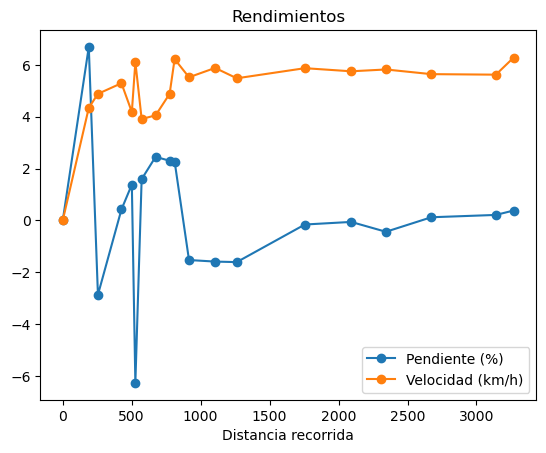

In [98]:
# Plotear el gráfico de rendimiento y guardar en JPG. Puedes ver ayuda en internet matplotlib.plot 
# Empieza para plotear 2 ejes
ig, ax = plt.subplots() # Crea una figura con 2 ejes
df.plot(x='Dist_O (m)', y='Pendiente (%)', marker = "o",ax=ax)
df.plot(x='Dist_O (m)', y='Velocidad (km/h)', marker = "o",ax=ax)
#igual al anterior pero representa distancias y velocidad km/h

ax.set(xlabel='Distancia recorrida', title='Rendimientos')
# Exportar en JPG o PNG
plt.show

# Mapa interactivo con Folium. Código ejemplo

In [108]:
#Instalar primeramente la libreria folium
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [109]:
#Código creación fichero de coordenadas
df.loc[:,['Latitud','Longitud']].to_csv('coordenadas.csv',header=True, index=False) #obtienes los valores de latitud y longitud y creas un fichero de coordenadas
lista_geo = pd.read_csv('coordenadas.csv').to_numpy().tolist()

#Creación del mapa interactivo
import folium
from folium import plugins
m = folium.Map()
folium.plugins.AntPath(locations = lista_geo, popup = 'Ruta 06/10/2025', reverse="True", dash_array=[10, 20], color='red', pulse_color = 'blue').add_to(m)
m.fit_bounds(m.get_bounds())
m

ModuleNotFoundError: No module named 'folium'